In [18]:
#file for sydney branch

In [1]:
#dependencies and setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from matplotlib.pylab import rcParams
import seaborn as sns

#import spotify keys
from config import client_id
from config import client_secret

In [2]:
#from: https://stmorse.github.io/journal/spotify-api.html

AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [3]:
#from: https://stmorse.github.io/journal/spotify-api.html

#base URL for Spotify API
base_url = 'https://api.spotify.com/v1/'

#In order to access, we send a properly formed GET request to the API server, with our access_token in the header. Let’s save this header info now, in the following very specific format:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [4]:
#import global top songs csv
global_songs_df = pd.read_csv("resources/global-weekly-2022-06-02.csv")

#extracting track id (removing "spotify:track:")
track_id_series = global_songs_df.uri.str[14:]

#convert to df and rename column
track_id_df = track_id_series.to_frame().rename(columns={"uri":"track_id"})

#merge dfs
cleaned_global_df = global_songs_df.merge(track_id_df, how="inner", left_index=True, right_index=True)

#pare down columns
cleaned_global_df = cleaned_global_df[["rank", "track_id", "artist_names", "track_name", "peak_rank", "previous_rank", "weeks_on_chart", "streams"]]
cleaned_global_df.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704


In [5]:
#empty lists to store song data
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
id_num = []
track_href = []
analysis_url = []
duration_mins = []
time_signature = []

In [6]:
for t in cleaned_global_df["track_id"]:
    response = requests.get(base_url + 'audio-features/' + t, headers=headers).json()
    
    #fill in track info for each audio feature / empty list
    danceability.append(response["danceability"])
    energy.append(response["energy"])
    key.append(response["key"])
    loudness.append(response["loudness"])
    mode.append(response["mode"])
    speechiness.append(response["speechiness"])
    acousticness.append(response["acousticness"])
    instrumentalness.append(response["instrumentalness"])
    liveness.append(response["liveness"])
    valence.append(response["valence"])
    tempo.append(response["tempo"])
    id_num.append(response["id"])
    track_href.append(response["track_href"])
    analysis_url.append(response["analysis_url"])    
    #duration recorded in api in milliseconds, converting to minutes here
    duration_mins.append(round((response["duration_ms"] / 60000),2))
    time_signature.append(response["time_signature"])
    

In [7]:
songs_dict = {
    "track_id": id_num,
    "danceability": danceability,
    "energy": energy,
    "key": key,
    "loudness": loudness,
    "mode": mode,
    "speechiness": speechiness,
    "acousticness": acousticness,
    "instrumentalness": instrumentalness,
    "liveness": liveness,
    "valence": valence,
    "tempo": tempo,
    "duration_mins": duration_mins,
    "time_signature": time_signature,
    "track_href": track_href,
    "analysis_url": analysis_url
    
}

song_info_df = pd.DataFrame(songs_dict)
song_info_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,6Sq7ltF9Qa7SNFBsV5Cogx,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3k3NWokhRRkEPhCzPmV8TW,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,75FEaRjZTKLhTrFGsfMUXR,0.629,0.547,10,-13.123,0,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,1IHWl5LamUGEuP4ozKQSXZ,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [8]:
full_track_data = cleaned_global_df.merge(song_info_df, how='inner', on="track_id")

In [9]:
full_track_data.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [10]:
tempo_dancibility_df = full_track_data.drop(columns=["weeks_on_chart", "loudness","mode","instrumentalness", "previous_rank", "speechiness", "energy", "acousticness", "liveness", "valence", "time_signature", "duration_mins"])
tempo_dancibility_df.set_index('track_id')

,rank,artist_names,track_name,peak_rank,streams,danceability,key,tempo,track_href,analysis_url
track_id,,,,,,,,,,
4Dvkj6JhhA12EX05fT7y2e,1,Harry Styles,As It Was,1,60420855,0.520,6,173.930,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
6Sq7ltF9Qa7SNFBsV5Cogx,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,39026161,0.911,1,92.005,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
3k3NWokhRRkEPhCzPmV8TW,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,37623538,0.647,3,79.928,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
75FEaRjZTKLhTrFGsfMUXR,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,32763806,0.629,10,108.375,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
1IHWl5LamUGEuP4ozKQSXZ,5,Bad Bunny,Tití Me Preguntó,5,31126704,0.650,5,106.672,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...
...,...,...,...,...,...,...,...,...,...,...
1WCEAGGRD066z2Q89ObXTq,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,178,5568564,0.601,4,122.872,https://api.spotify.com/v1/tracks/1WCEAGGRD066...,https://api.spotify.com/v1/audio-analysis/1WCE...
2N8m6CYs74qQO4mjVcXO30,197,Tones And I,Dance Monkey,1,5556591,0.824,6,98.029,https://api.spotify.com/v1/tracks/2N8m6CYs74qQ...,https://api.spotify.com/v1/audio-analysis/2N8m...
5JCoSi02qi3jJeHdZXMmR8,198,Olivia Rodrigo,favorite crime,11,5552673,0.369,9,172.929,https://api.spotify.com/v1/tracks/5JCoSi02qi3j...,https://api.spotify.com/v1/audio-analysis/5JCo...


In [11]:
tempo_dancibility_df.describe()

,rank,peak_rank,streams,danceability,key,tempo
count,200.000000,200.00000,2.000000e+02,200.000000,200.000000,200.000000
mean,100.500000,36.67000,1.039922e+07,0.677420,5.700000,122.764030
std,57.879185,44.61675,6.864669e+06,0.145284,3.741657,29.751379
min,1.000000,1.00000,5.548718e+06,0.315000,0.000000,71.105000
25%,50.750000,5.00000,6.284778e+06,0.578500,2.000000,100.006000
50%,100.500000,17.00000,7.982727e+06,0.695000,6.000000,117.947000
75%,150.250000,53.25000,1.205175e+07,0.795000,9.000000,140.120750
max,200.000000,178.00000,6.042086e+07,0.949000,11.000000,196.120000


The correlation between tempo and danceability is -0.21
The r-squared value is: 0.04481168061787252


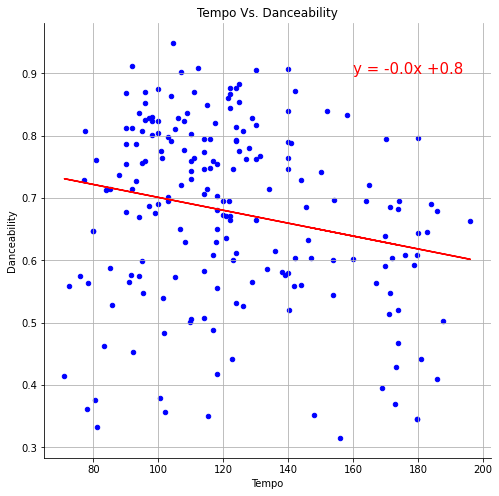

In [12]:

rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Looking at the relationship between tempo and danceability of global top songs 

#make the columns in question numeric 
tempo_dancibility_df['tempo'] = pd.to_numeric(tempo_dancibility_df['tempo'])
tempo_dancibility_df['danceability'] = pd.to_numeric(tempo_dancibility_df['danceability'])

#create a scatter plot to see correlation between variables 
tempo_dancibility_df.plot(kind="scatter", x="tempo", y="danceability", c = ['blue'], grid=True, figsize=(8,8),
              title="Tempo Vs. Danceability")

#find correlation between the variables and print
tempo = tempo_dancibility_df['tempo']
danceability = tempo_dancibility_df["danceability"]
correlation = st.pearsonr(tempo,danceability)
print(f"The correlation between tempo and danceability is {round(correlation[0],2)}")

plt.xlabel('Tempo')
plt.ylabel('Danceability')

#linear regression and add to plot 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tempo,danceability)
regress_values = tempo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(160,0.9),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
plt.plot(tempo,regress_values,"r-");

#save the graph to the images folder 
plt.savefig('images/Tempo_vs_Danceability')


#display the graph with the correlation number 

plt.show()


The correlation between tempo and streams is -0.08
The r-squared value is: 0.006670115334065983


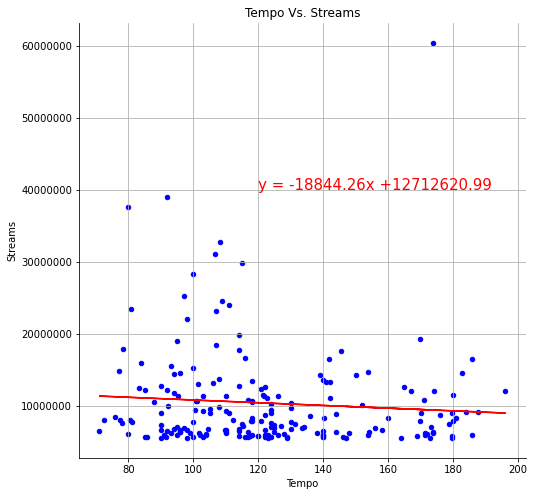

In [13]:
#make the columns in question numeric 
tempo_dancibility_df['tempo'] = pd.to_numeric(tempo_dancibility_df['tempo'])
tempo_dancibility_df['streams'] = pd.to_numeric(tempo_dancibility_df['streams'])

#create a scatter plot to see correlation between variables 
tempo_dancibility_df.plot(kind="scatter", x="tempo", y="streams", c = ['blue'], grid=True, figsize=(8,8),
              title="Tempo Vs. Streams")

#find correlation between the variables and print
tempo = tempo_dancibility_df["tempo"]
streams = tempo_dancibility_df["streams"]
correlation = st.pearsonr(tempo,streams)
print(f"The correlation between tempo and streams is {round(correlation[0],2)}")

plt.xlabel('Tempo')
plt.ylabel('Streams')

plt.ticklabel_format(style='plain')

#linear regression and add to plot 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tempo,streams)
regress_values = tempo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(120,40000000),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
plt.plot(tempo,regress_values,"r-");


#save the graph to the images folder 
plt.savefig('images/Tempo_vs_Streams')

#display the graph with the correlation number 
plt.show()

In [14]:
tempo_dancibility_df = tempo_dancibility_df.drop(labels=None, axis=0, index = 0)

The correlation between tempo and streams is -0.17
The r-squared value is: 0.029149040040547997


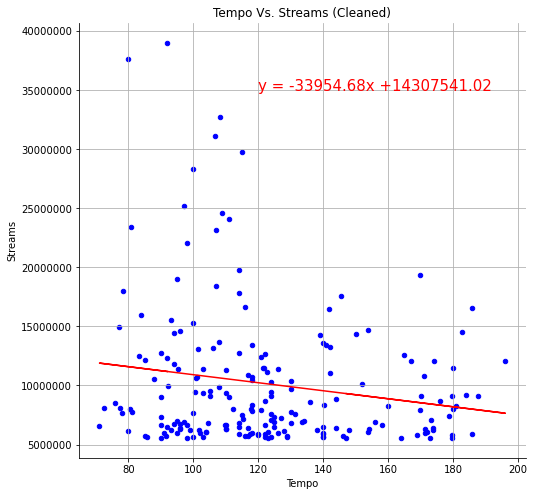

In [15]:
#create a scatter plot to see correlation between variables 
tempo_dancibility_df.plot(kind="scatter", x="tempo", y="streams", c = ['blue'], grid=True, figsize=(8,8),
              title="Tempo Vs. Streams (Cleaned)")

#find correlation between the variables and print
tempo = tempo_dancibility_df["tempo"]
streams = tempo_dancibility_df["streams"]
correlation = st.pearsonr(tempo,streams)
print(f"The correlation between tempo and streams is {round(correlation[0],2)}")

plt.xlabel('Tempo')
plt.ylabel('Streams')

plt.ticklabel_format(style='plain')

#linear regression and add to plot 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tempo,streams)
regress_values = tempo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(120,35000000),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
plt.plot(tempo,regress_values,"r-");


#save the graph to the images folder 
plt.savefig('images/Tempo_vs_Streams_Cleaned')

#display the graph with the correlation number 
plt.show()